# Problem Statement:
### Transport and communication are in the crucial domain in the field of analytics. Environmental impacts and safety are, nowadays, two major concerns of the scientific community with respect to transport scenarios and to the ever-growing urban areas. These issues gain more importance due to the increasing amount of vehicles and people. Seeking new solutions is reaching a point where available technologies and artificial intelligence, especially MAS, are being recognized as ways to cope with and tackle these kinds of problems in a distributed and more appropriate way. 
### A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll. The term is often expanded to cover other wildlife strikes - with bats or ground animals. Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents. 
### Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.   

### Importing the necessary libraries

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/Users/manjeetkour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Loading the dataset into dataframe

In [3]:
df=pd.read_csv("Bird Strikes.csv")
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


### Check the datatypes and transforming which doesnt suit the business needs

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [5]:
df['Cost: Total $'] = df['Cost: Total $'].str.replace(',', '')
df['Cost: Total $'] = df['Cost: Total $'].astype(int)

### Dropping irrelevant columns

In [6]:
df=df.drop(columns=['Remains of wildlife collected?','Remains of wildlife sent to Smithsonian','Remarks','Wildlife: Species','Is Aircraft Large?'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Record ID                           25558 non-null  int64 
 1   Aircraft: Type                      25429 non-null  object
 2   Airport: Name                       25429 non-null  object
 3   Altitude bin                        25429 non-null  object
 4   Aircraft: Make/Model                25558 non-null  object
 5   Wildlife: Number struck             25429 non-null  object
 6   Wildlife: Number Struck Actual      25558 non-null  int64 
 7   Effect: Impact to flight            2078 non-null   object
 8   FlightDate                          25429 non-null  object
 9   Effect: Indicated Damage            25558 non-null  object
 10  Aircraft: Number of engines?        25291 non-null  object
 11  Aircraft: Airline/Operator          25429 non-null  ob

### Handling duplicate and missing values

In [18]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [7]:
total_missing_values = df.isna().sum() 
print("Total Missing Values:", total_missing_values)

Total Missing Values: Record ID                                 0
Aircraft: Type                          129
Airport: Name                           129
Altitude bin                            129
Aircraft: Make/Model                      0
Wildlife: Number struck                 129
Wildlife: Number Struck Actual            0
Effect: Impact to flight              23480
FlightDate                              129
Effect: Indicated Damage                  0
Aircraft: Number of engines?            267
Aircraft: Airline/Operator              129
Origin State                            449
When: Phase of flight                   129
Conditions: Precipitation             23543
Wildlife: Size                          129
Conditions: Sky                           0
Pilot warned of birds or wildlife?      129
Cost: Total $                             0
Feet above ground                       129
Number of people injured                  0
dtype: int64


In [8]:
df.fillna(0, inplace=True)

In [9]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,US AIRWAYS*,New York,Climb,0,Medium,No Cloud,N,30736,"1,500",0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,0,7/25/01 0:00,Caused damage,...,AMERICAN AIRLINES,Texas,Landing Roll,0,Small,Some Cloud,Y,0,0,0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,0,9/14/01 0:00,No damage,...,BUSINESS,Louisiana,Approach,0,Small,No Cloud,N,0,50,0
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,ALASKA AIRLINES,Washington,Climb,0,Small,Some Cloud,Y,0,50,0
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,0,6/23/03 0:00,No damage,...,COMAIR AIRLINES,Virginia,Approach,0,Small,No Cloud,N,0,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,0,12/30/11 0:00,No damage,...,SKYWEST AIRLINES,California,Approach,Fog,Large,Overcast,N,0,"1,500",0
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,0,12/30/11 0:00,No damage,...,US AIRWAYS,Florida,Landing Roll,0,Small,Some Cloud,Y,0,0,0
25555,319680,0,0,0,EC-135,0,1,0,0,No damage,...,0,Virginia,0,0,0,No Cloud,0,0,0,0
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,0,12/31/11 0:00,No damage,...,DELTA AIR LINES,Michigan,Landing Roll,0,Medium,Some Cloud,Y,0,0,0


### Look into outliers 

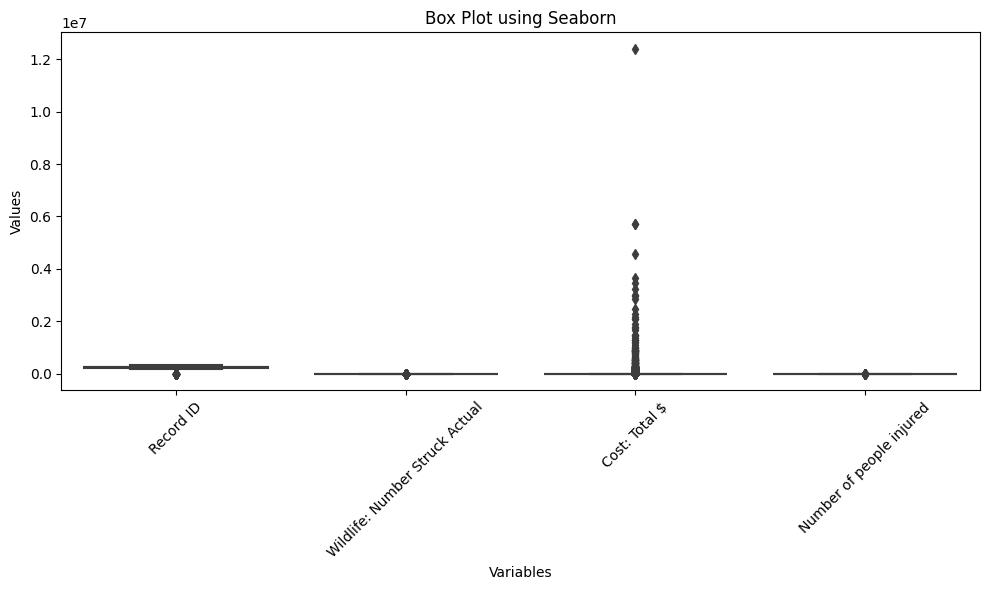

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot using Seaborn')
plt.xticks(rotation=45)  # Optionally, rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data Analysis

### Visuals Depicting the Number of Bird Strikes

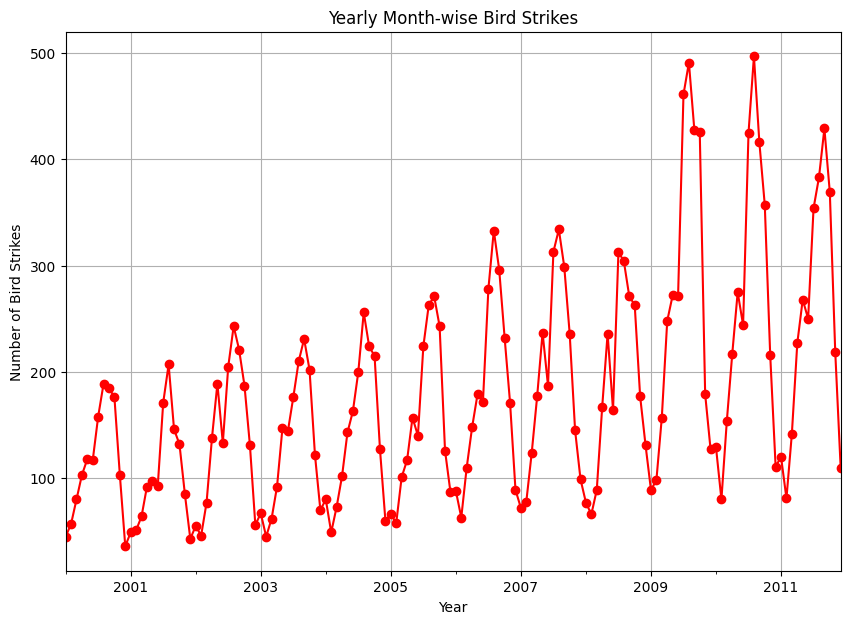

In [15]:
df=pd.read_csv("Bird Strikes.csv")
df
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Group by year and count the number of bird strikes
strikes_by_month = df.groupby(df['FlightDate'].dt.to_period('M')).size()

# Plotting the number of bird strikes over time
plt.figure(figsize=(10, 7))
strikes_by_month.plot(kind='line', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.title('Yearly Month-wise Bird Strikes')
plt.grid(True)
plt.show()

### Yearly Analysis & Bird Strikes in the various states of US

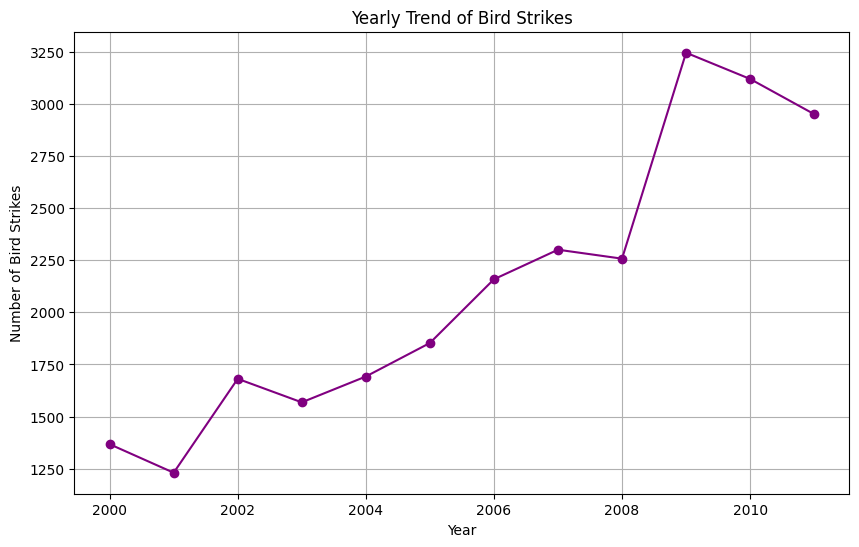

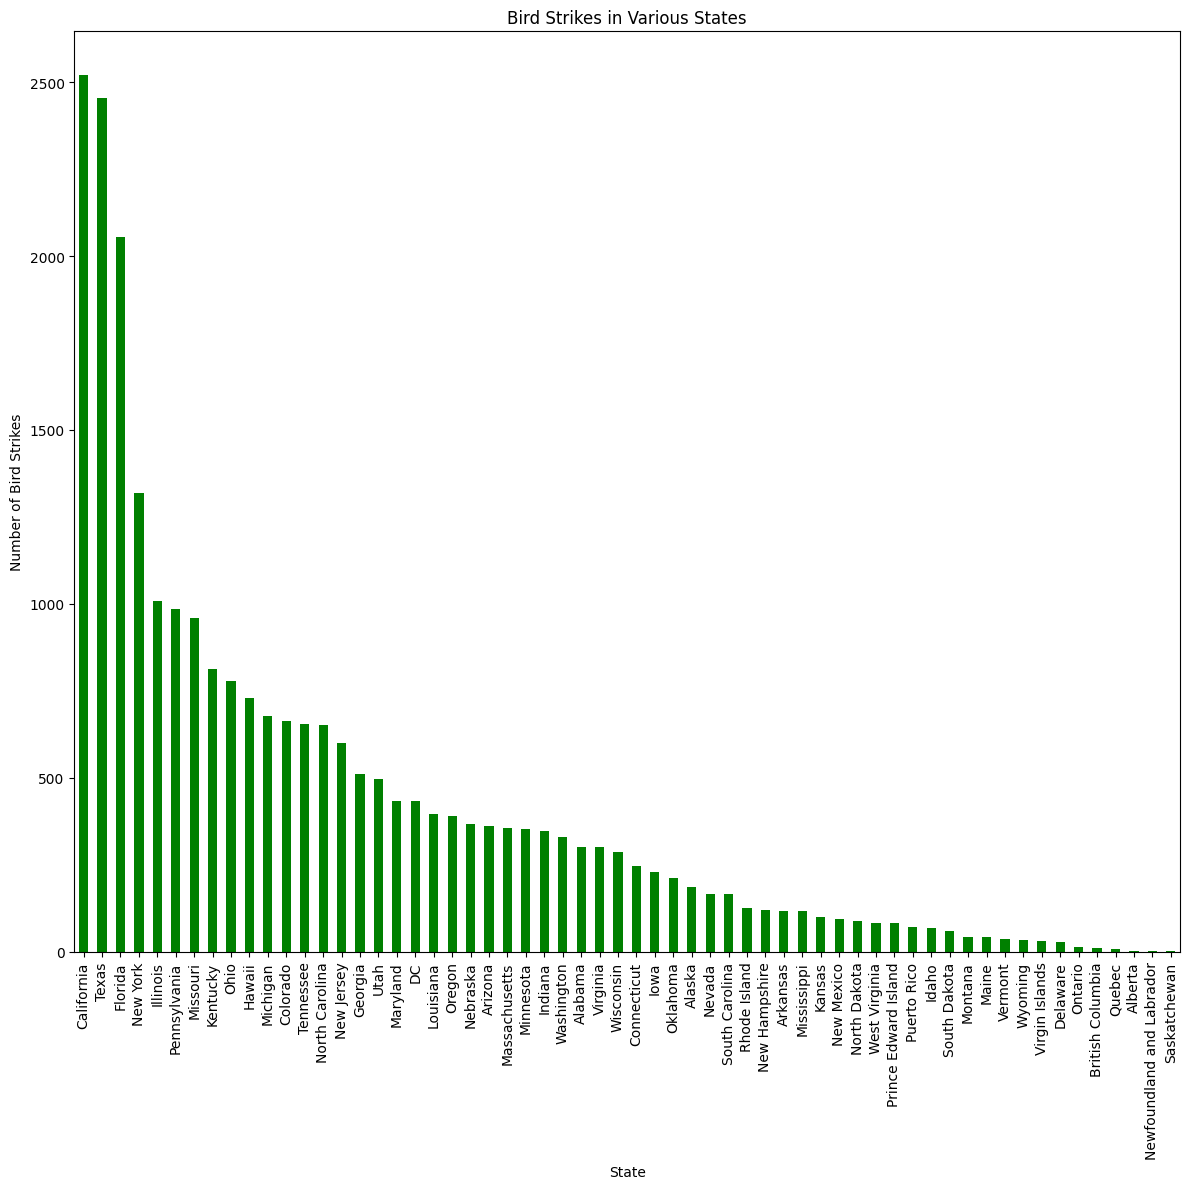

In [14]:
df=pd.read_csv("Bird Strikes.csv")
df
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract year from 'Date' column
df['Year'] = df['FlightDate'].dt.year

# Yearly Analysis
strikes_by_year = df.groupby('Year').size()

# Plotting the yearly trend of bird strikes
plt.figure(figsize=(10, 6))
strikes_by_year.plot(kind='line', marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.title('Yearly Trend of Bird Strikes')
plt.grid(True)
plt.show()

# Bird Strikes in Various States

strikes_by_state = df.groupby('Origin State').size().sort_values(ascending=False)

# Plotting the number of bird strikes in various states
plt.figure(figsize=(12, 12))
strikes_by_state.plot(kind='bar', color='green')
plt.xlabel('State')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes in Various States')

plt.tight_layout()
plt.show()

### Top 10 US Airlines in terms of having encountered bird strikes

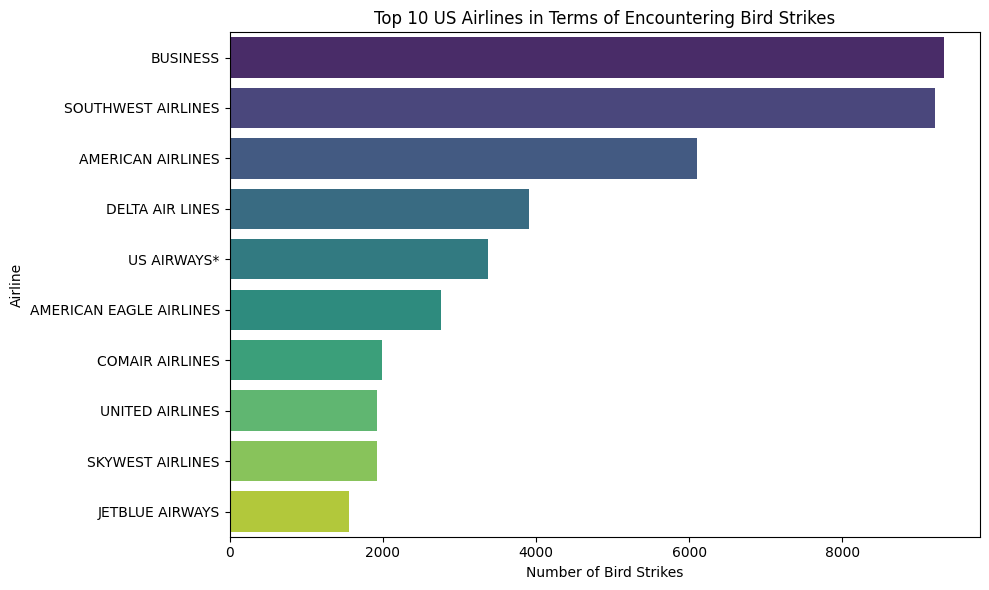

In [17]:
bird_strikes_by_airline = df.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().reset_index()

# Sort the airlines based on the total number of bird strikes encountered
top_10_airlines = bird_strikes_by_airline.sort_values(by='Wildlife: Number Struck Actual', ascending=False).head(10)

# Plotting the top 10 airlines in terms of encountering bird strikes
plt.figure(figsize=(10, 6))
sns.barplot(x='Wildlife: Number Struck Actual', y='Aircraft: Airline/Operator', data=top_10_airlines, palette='viridis')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.title('Top 10 US Airlines in Terms of Encountering Bird Strikes')
plt.tight_layout()
plt.show()

### Airports with most incidents of bird strikes – Top 50

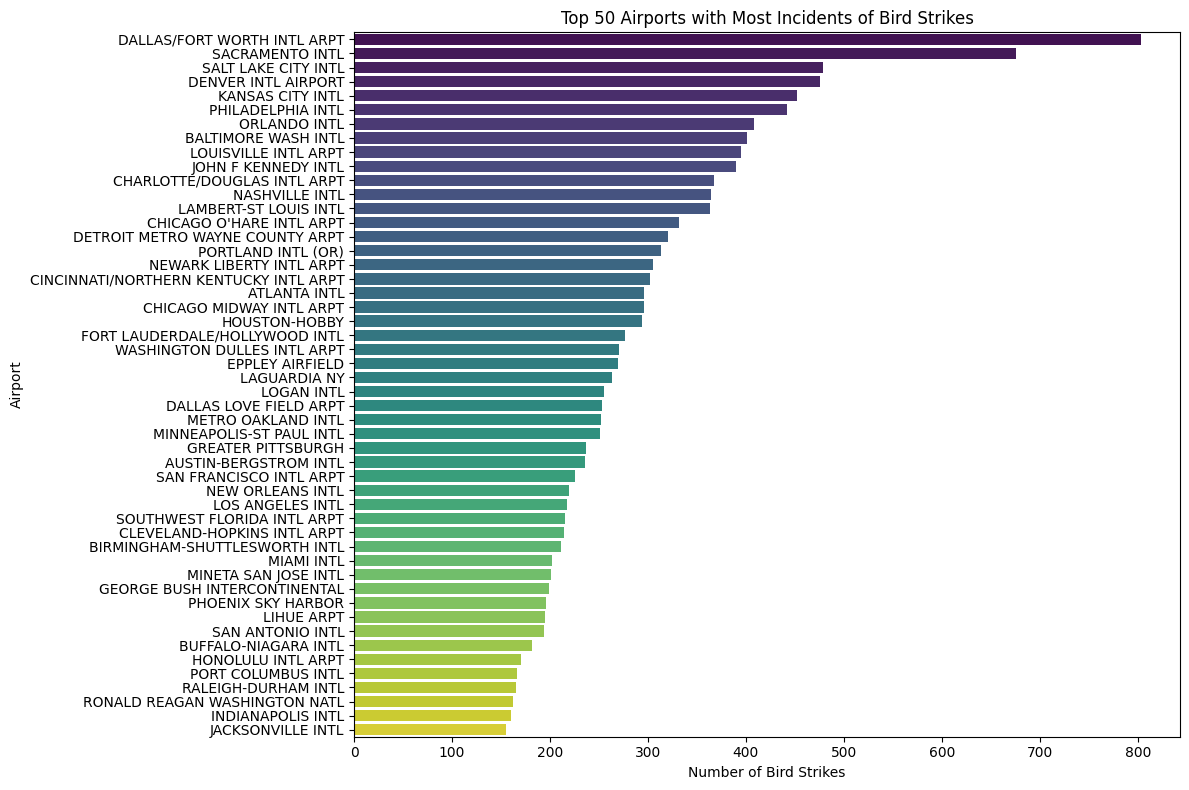

In [18]:
bird_strikes_by_airport = df['Airport: Name'].value_counts().reset_index()
bird_strikes_by_airport.columns = ['Airport: Name', 'Wildlife: Number Struck Actual']

# Sort the airports based on the total number of bird strike incidents
top_50_airports = bird_strikes_by_airport.head(50)

# Plotting the top 50 airports with the most incidents of bird strikes
plt.figure(figsize=(12, 8))
sns.barplot(x='Wildlife: Number Struck Actual', y='Airport: Name', data=top_50_airports, palette='viridis')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.title('Top 50 Airports with Most Incidents of Bird Strikes')
plt.tight_layout()
plt.show()

### Yearly Cost Incurred due to Bird Strikes

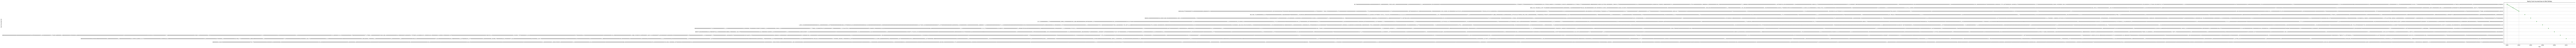

In [29]:
df=pd.read_csv("Bird Strikes.csv")
df
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract year from 'Date' column
df['Year'] = df['FlightDate'].dt.year

# Group the data by year and sum the total cost incurred due to bird strikes each year
yearly_cost_due_to_bird_strikes = df.groupby('Year')['Cost: Total $'].sum().reset_index()
#yearly_cost_due_to_bird_strikes

# Plotting the yearly cost incurred due to bird strikes
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Cost: Total $', data=yearly_cost_due_to_bird_strikes, marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Cost Incurred ($)')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.grid(True)
plt.tight_layout()
plt.show()

### Altitude of aeroplanes at the time of strike

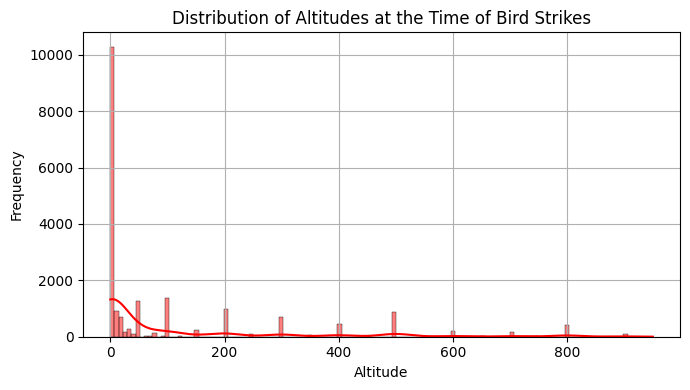

In [22]:
df.dropna(subset=['Feet above ground'], inplace=True)

# Convert all values in 'Altitude' column to strings
df['Altitude'] = df['Feet above ground'].astype(str)

# Remove any non-numeric characters from the 'Altitude' column
df['Altitude'] = df['Altitude'].str.replace('[^0-9]', '')

# Convert 'Altitude' column to numeric
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

# Plotting the distribution of altitudes
plt.figure(figsize=(7, 4))
sns.histplot(df['Altitude'], kde=True, color='red')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitudes at the Time of Bird Strikes')
plt.grid(True)
plt.tight_layout()
plt.show()

### Phase of flight at the time of the strike.

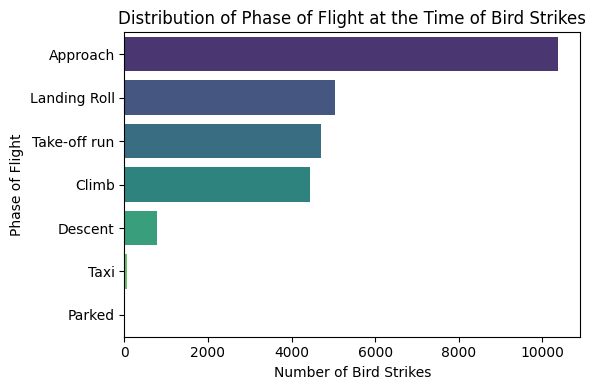

In [23]:
df = df.loc[df['When: Phase of flight'] != 0]
df.dropna(subset=['When: Phase of flight'], inplace=True)

# Plotting the distribution of phases of flight
plt.figure(figsize=(6, 4))
sns.countplot(y='When: Phase of flight', data=df, palette='viridis', order=df['When: Phase of flight'].value_counts().index)
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Phase of Flight')
plt.title('Distribution of Phase of Flight at the Time of Bird Strikes')
plt.tight_layout()
plt.show()

### Average Altitude of the aeroplanes in different phases at the time of strike

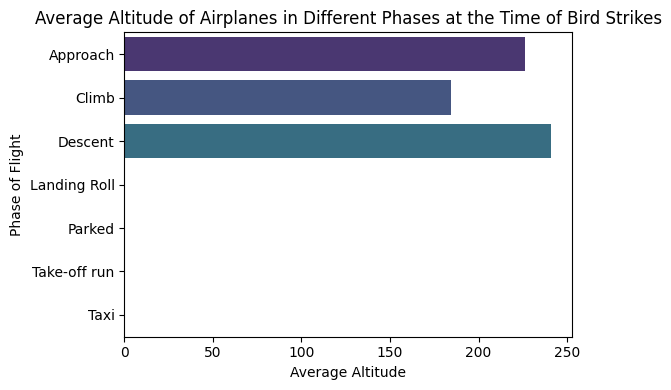

In [24]:
df['Altitude'] = df['Feet above ground'].astype(str)

# Remove any non-numeric characters from the 'Altitude' column
df['Altitude'] = df['Altitude'].str.replace('[^0-9]', '')

# Convert 'Altitude' column to numeric
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')
df_filtered = df[['When: Phase of flight','Altitude']]

# Drop rows with missing altitude values (if any)
df_filtered.dropna(subset=['Altitude'], inplace=True)

# Group the data by 'Phase_of_Flight' and calculate the average altitude for each phase
average_altitude_by_phase = df_filtered.groupby('When: Phase of flight')['Altitude'].mean().reset_index()

# Plotting the average altitudes for different phases
plt.figure(figsize=(6, 4))
sns.barplot(x='Altitude', y='When: Phase of flight', data=average_altitude_by_phase, palette='viridis')
plt.xlabel('Average Altitude')
plt.ylabel('Phase of Flight')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strikes')
plt.tight_layout()
plt.show()

### Effect of Bird Strikes & Impact on Flight

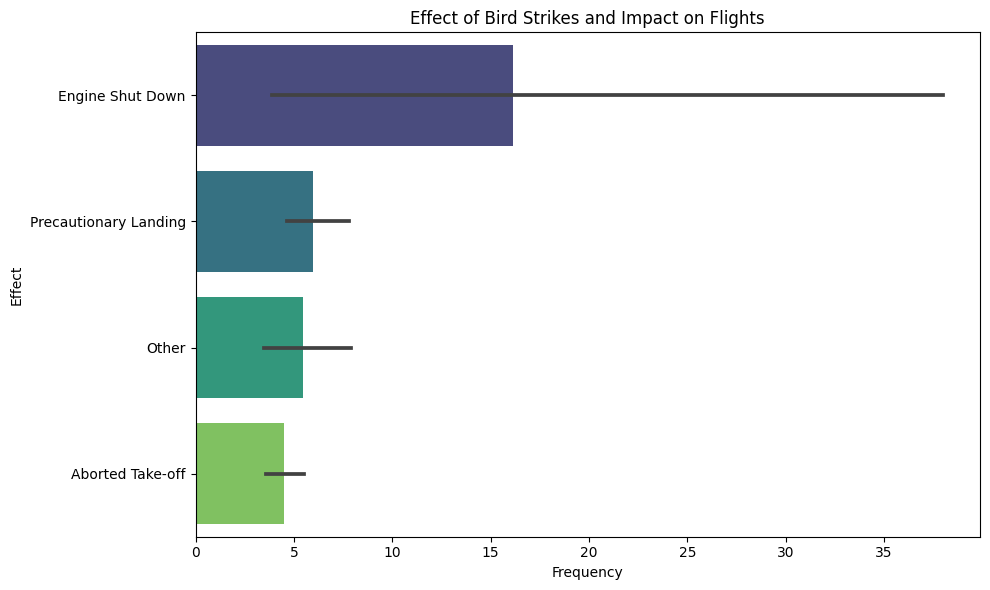

In [26]:
df=pd.read_csv("Bird Strikes.csv")
df
df = df.loc[df['Effect: Impact to flight'] != 0]
plt.figure(figsize=(10, 6))
sns.barplot(x='Wildlife: Number Struck Actual', y='Effect: Impact to flight', data=df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Effect')
plt.title('Effect of Bird Strikes and Impact on Flights')
plt.tight_layout()
plt.show()

### Effect of Strike at Different Altitude

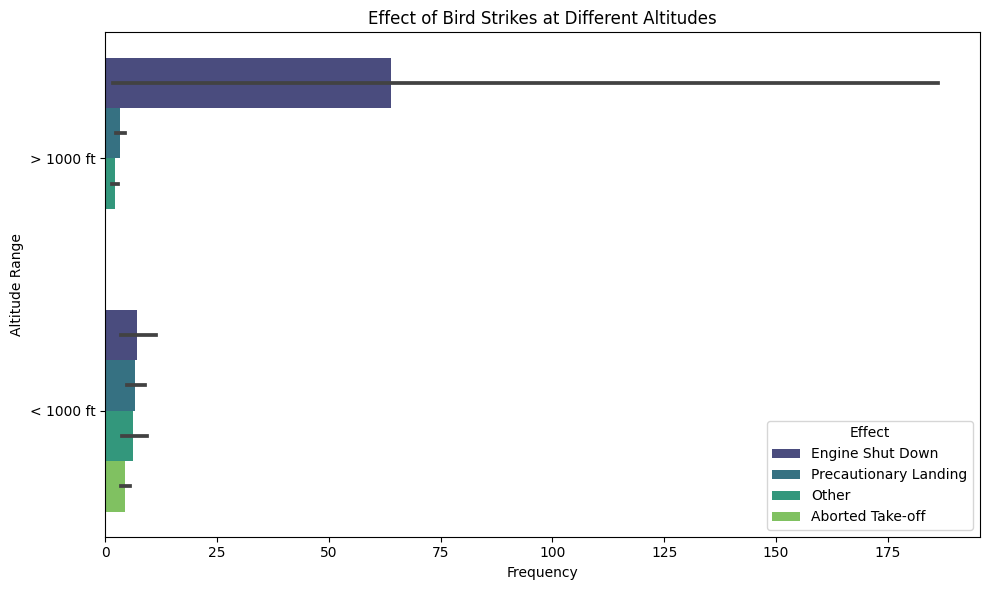

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Wildlife: Number Struck Actual', y='Altitude bin', hue='Effect: Impact to flight', data=df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Altitude Range')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.tight_layout()
plt.legend(title='Effect')
plt.show()

### Were Pilots Informed? & Prior Warning and Effect of Strike Relation

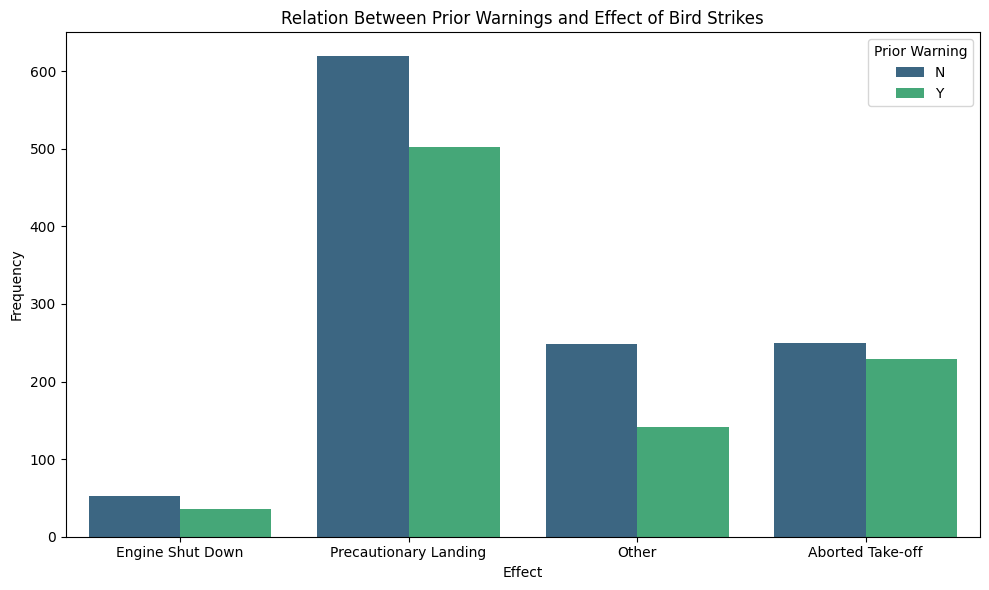

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='viridis')
plt.xlabel('Effect')
plt.ylabel('Frequency')
plt.title('Relation Between Prior Warnings and Effect of Bird Strikes')
plt.tight_layout()
plt.legend(title='Prior Warning')
plt.show()